In [103]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
import xarray as xr
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib import cm
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [104]:
rain=xr.open_dataset('D:/pai/data/monthlymean/imdrainfall_MERGED_DATA_S_ASIA_1982_2019.nc')

In [105]:
clim_r=rain.groupby('time.month').mean(dim='time')

In [106]:
clim_r.to_netcdf('yearlymean.nc')

In [107]:
clim_r=xr.open_dataset('ym.nc') #this step is done in cdo

In [108]:
lon_r = clim_r.LONGITUDE
lat_r = clim_r.LATITUDE

Text(0.5, 1.0, 'Climatology of Rainfall on January ')

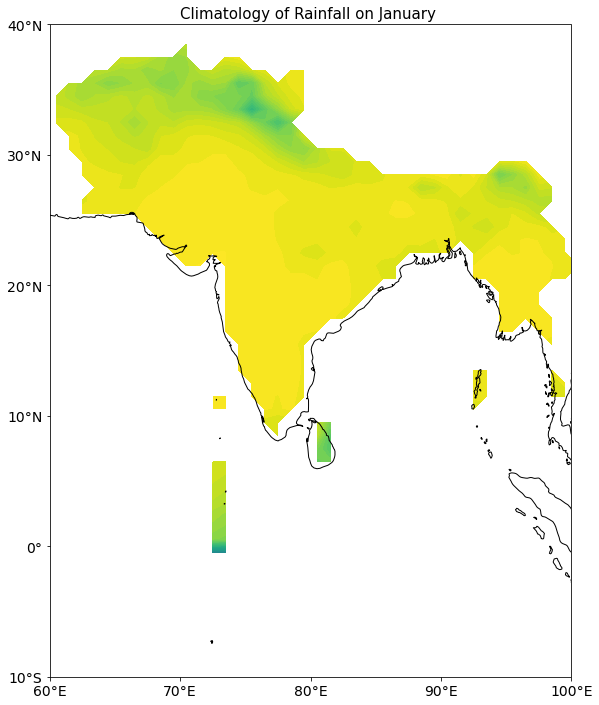

In [111]:
fig, ax = plt.subplots(figsize=(20,12))
ax = plt.axes(projection=ccrs.PlateCarree())
level=np.arange(0.1,500,10) 
shrink=0.85
img_extent =[60, 100, -10, 40] 
ax.set_extent(img_extent, ccrs.PlateCarree())                 #set the required region

ax.coastlines()                                               #add boundary
ax.set_xticks([60,70,80,90,100], crs=ccrs.PlateCarree())        # decide xaxis ticks, for projection: https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/intro.html
ax.set_yticks([-10, 0,10, 20,30,40], crs=ccrs.PlateCarree())  #decide y axis levels
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.tick_params(axis='both',labelsize=14)               

c = ax.contourf(lon_r, lat_r, clim_r.rf[1,:,:], extent=img_extent, cmap=cm.viridis_r,levels=level,extend='both',transform=ccrs.PlateCarree())

ax.set_title('Climatology of Rainfall on January ',fontsize= 15)